<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/pcb%20raw%20now%20dng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
import os
os.chdir('/content/drive/My Drive/Raw_PCB')
os.getcwd()

'/content/drive/My Drive/Raw_PCB'

In [5]:
import numpy as np
a=np.load("s_x_train.npy")
b=np.load("s_y_train.npy")
print(a.shape)
print(b.shape)

(2669, 300, 300, 3)
(2669,)


In [0]:
from sklearn.utils import shuffle
(a,b)=shuffle(a,b)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.33, random_state=42)

In [8]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(1788, 300, 300, 3)
(1788,)
(881, 300, 300, 3)
(881,)
4
uint8
4
uint8
4
uint8


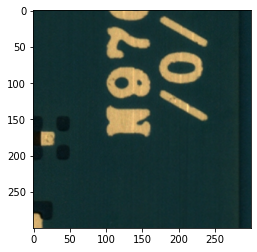

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [11]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788,)


In [12]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
1.0 1.0
0.0 0.0
51.106243
54.234528
3.7594824 3.7594824
-0.94231933 -0.94231933


In [13]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[0. 1.]


In [14]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [24]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.utils import plot_model
import keras

input1 = keras.layers.Input(shape=(300,300,3))

x1 = Conv2D(300,(3,3),strides=(2,2) ,activation='relu')(input1)
x2=keras.layers.BatchNormalization(axis = 3)(x1)
x3= Activation('relu')(x2)
x4= MaxPooling2D((3, 3), strides=(2, 2))(x3)

x5= Conv2D(200,(2,2),strides=(2,2) ,activation='relu')(x4)
x6=keras.layers.BatchNormalization(axis = 3)(x5)
x7= Activation('relu')(x6)
x8= MaxPooling2D((3, 3), strides=(2, 2))(x7)

x9= Conv2D(200,(1,1),strides=(1,1) ,activation='relu')(x8)
x10=keras.layers.BatchNormalization(axis = 3)(x9)
x11= Activation('relu')(x10)


o=keras.layers.Flatten()(x11)








out = keras.layers.Dense(1024,activation="relu")(o)
out = keras.layers.Dense(1024,activation="relu")(out)
out = keras.layers.Dense(100,activation="relu")(out)
out1=keras.layers.Dense(2,activation="softmax")(out)

model = keras.models.Model(inputs=input1, outputs=out1)

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 149, 149, 300)     8400      
_________________________________________________________________
batch_normalization_8 (Batch (None, 149, 149, 300)     1200      
_________________________________________________________________
activation_8 (Activation)    (None, 149, 149, 300)     0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 300)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 200)       240200    
_________________________________________________________________
batch_normalization_9 (Batch (None, 37, 37, 200)       800 

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

In [17]:
print(xtrain.shape)
print(ytrain.shape)

(1788, 300, 300, 3)
(1788, 2)


In [18]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.33), batch_size=20,epochs=20, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1197 samples, validate on 591 samples
Epoch 1/8
1197/1197 [==============================] - 263s 219ms/step - loss: 0.5855 - acc: 0.9256 - val_loss: 0.6594 - val_acc: 0.9459
Epoch 2/8
1197/1197 [==============================] - 261s 218ms/step - loss: 1.6307 - acc: 0.8713 - val_loss: 0.6487 - val_acc: 0.9459
Epoch 3/8
1197/1197 [==============================] - 262s 219ms/step - loss: 0.4496 - acc: 0.9515 - val_loss: 0.6274 - val_acc: 0.9459
Epoch 4/8
1197/1197 [==============================] - 260s 217ms/step - loss: 0.4314 - acc: 0.9557 - val_loss: 0.3265 - val_acc: 0.9425
Epoch 5/8
1197/1197 [==============================] - 259s 216ms/step - loss: 0.1924 - acc: 0.9515 - val_loss: 0.1868 - val_acc: 0.9459
Epoch 6/8
1197/1197 [==============================] - 259s 216ms/step - loss: 0.1204 - acc: 0.9574 - val_loss: 0.2128 - val_acc: 0.9459
Epoch 7/8
1197/1197 [==============

In [19]:
model.evaluate(xtest,ytest)

881/881 [==============================] - 68s 77ms/step


[0.259838668699297, 0.9364358684667529]

In [20]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.67      0.16      0.26        61
     class 1       0.94      0.99      0.97       820

    accuracy                           0.94       881
   macro avg       0.80      0.58      0.61       881
weighted avg       0.92      0.94      0.92       881



In [21]:
model.evaluate(xtrain,ytrain)

1788/1788 [==============================] - 138s 77ms/step


[0.08996233285740185, 0.9703579417011082]

In [22]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtrain)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytrain,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.73      0.64      0.68        88
     class 1       0.98      0.99      0.98      1700

    accuracy                           0.97      1788
   macro avg       0.85      0.81      0.83      1788
weighted avg       0.97      0.97      0.97      1788

